In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cPickle as pickle

# Experiment 1 

In [11]:

numtrials=10
numep = 200
alpha =0.5
eps = 0.05
lambdas = [0.,0.5,1.] #try multiple lambdas

#store data in 5d array
steps = np.zeros((len(lambdas),numep,numtrials))

def extendList(teller, val):
    return [val] * teller

for t in range(1,numtrials+1):
    for i,l in enumerate(lambdas):
        with open('data/SARSA_a_'+str(alpha)+'_l_'+str(l)+'_e_'+str(eps)+'/SARSA_log.'+str(t),'rb') as f:
            print 'Opened file: ' + 'data/SARSA_a_'+str(alpha)+'_l_'+str(l)+'_e_'+str(eps)+'/SARSA_log.'+str(t)
            log = pickle.load(f)
            steps[i,:,t-1] = np.concatenate((np.array(log['steps']), extendList(200 - len(log['steps']), log['steps'][len(log['steps'])-1])),0)

Opened file: data/SARSA_a_0.5_l_0.0_e_0.05/SARSA_log.1
Opened file: data/SARSA_a_0.5_l_0.5_e_0.05/SARSA_log.1
Opened file: data/SARSA_a_0.5_l_1.0_e_0.05/SARSA_log.1
Opened file: data/SARSA_a_0.5_l_0.0_e_0.05/SARSA_log.2
Opened file: data/SARSA_a_0.5_l_0.5_e_0.05/SARSA_log.2
Opened file: data/SARSA_a_0.5_l_1.0_e_0.05/SARSA_log.2
Opened file: data/SARSA_a_0.5_l_0.0_e_0.05/SARSA_log.3
Opened file: data/SARSA_a_0.5_l_0.5_e_0.05/SARSA_log.3
Opened file: data/SARSA_a_0.5_l_1.0_e_0.05/SARSA_log.3
Opened file: data/SARSA_a_0.5_l_0.0_e_0.05/SARSA_log.4
Opened file: data/SARSA_a_0.5_l_0.5_e_0.05/SARSA_log.4
Opened file: data/SARSA_a_0.5_l_1.0_e_0.05/SARSA_log.4
Opened file: data/SARSA_a_0.5_l_0.0_e_0.05/SARSA_log.5
Opened file: data/SARSA_a_0.5_l_0.5_e_0.05/SARSA_log.5
Opened file: data/SARSA_a_0.5_l_1.0_e_0.05/SARSA_log.5
Opened file: data/SARSA_a_0.5_l_0.0_e_0.05/SARSA_log.6
Opened file: data/SARSA_a_0.5_l_0.5_e_0.05/SARSA_log.6
Opened file: data/SARSA_a_0.5_l_1.0_e_0.05/SARSA_log.6
Opened fil

Calculate basic statistics of number of steps over different trials

In [12]:
from scipy import stats
mean_steps = np.mean(steps,axis=2) #average steps
err =stats.sem(steps,axis=2) #standard error of mean

#statistics for first 50 episodes
mean_50 = np.mean(steps[:50,:],axis=2)
err_50 = stats.sem(steps[:50,:],axis=2) #standard error of mean


Plot learning curves with 95% confidence (t_dist standard error Note: this assumes normal distribution of means, probably not true here)

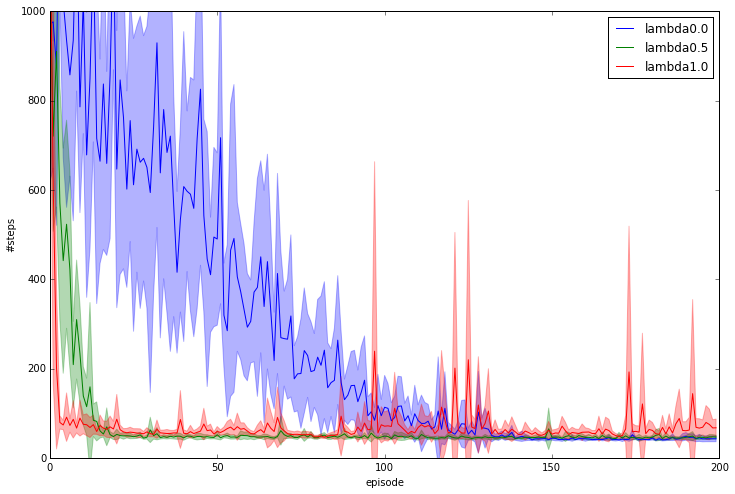

In [13]:
plt.figure(figsize=(12,8))

confidence = 0.95
#factor for given confidence and number of trials
t= stats.t._ppf((1+confidence)/2., numtrials-1)

colors=['blue','green','red']
for i in range(len(lambdas)):
    plt.plot(mean_steps[i,:],label='lambda'+str(lambdas[i]))
    plt.fill_between(np.arange(numep),(mean_steps[i,:]-t*err[i,:]),(mean_steps[i,:]+t*err[i,:]),alpha=0.3,color=colors[i])

plt.xlabel('episode')
plt.ylabel('#steps')
plt.ylim((0,1000))
plt.legend()

We can smooth the curves by taking a running average or applying a filter

In [14]:
from scipy.signal import gaussian
from scipy.ndimage import filters

#gaussian filter (running average but closer points have higher weights)
def smoothing(x,window,axis=0):
    filt = gaussian(window,2.)
    return filters.convolve1d(x,filt/np.sum(filt),axis)

#standard running average
def running_average(x,window,axis=0):
    return filters.convolve1d(x,np.ones(window),axis)

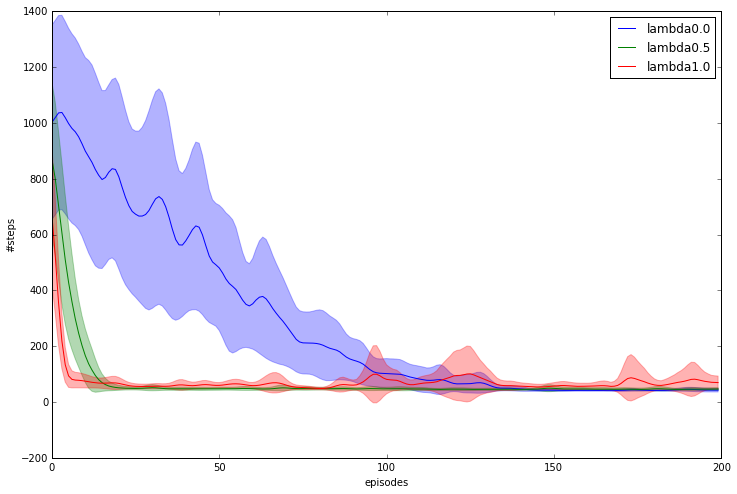

In [15]:
mean_sm = smoothing(mean_steps,10,1)
err_sm = smoothing(err,10,1)

plt.figure(figsize=(12,8))
colors=['blue','green','red']
for i in range(len(lambdas)):
    plt.plot(mean_sm[i,:],label='lambda'+str(lambdas[i]))
    plt.fill_between(np.arange(numep),(mean_sm[i,:]-t*err_sm[i,:]),(mean_sm[i,:]+t*err_sm[i,:]),alpha=0.3,color=colors[i])

plt.ylabel('#steps')
plt.xlabel('episodes')

plt.legend()

Load and visualize Qvalues

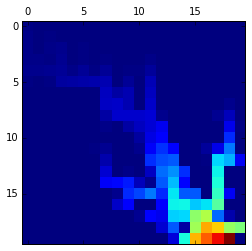

In [16]:
with open('data/SARSA_a_0.5_l_0.0_e_0.05/SARSA_theta.1','rb') as f:
    theta = pickle.load(f)
values = np.max(theta,axis=1) #greedy state values (max over Q-values) 
plt.matshow(values.reshape(20,20),vmin=0.,vmax=10.)

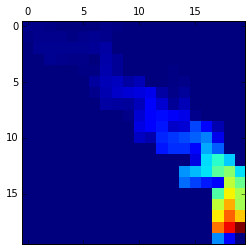

In [17]:
with open('data/SARSA_a_0.5_l_0.5_e_0.05/SARSA_theta.1','rb') as f:
    theta = pickle.load(f)
values = np.max(theta,axis=1) #greedy state values (max over Q-values) 
plt.matshow(values.reshape(20,20),vmin=0.,vmax=10.)

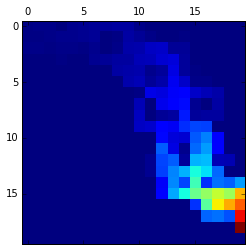

In [18]:
with open('data/SARSA_a_0.5_l_1.0_e_0.05/SARSA_theta.1','rb') as f:
    theta = pickle.load(f)
values = np.max(theta,axis=1) #greedy state values (max over Q-values) 
plt.matshow(values.reshape(20,20),vmin=0.,vmax=10.)

Compare how fast we learn for different lambdas (look at average lengths of first 50 episodes)

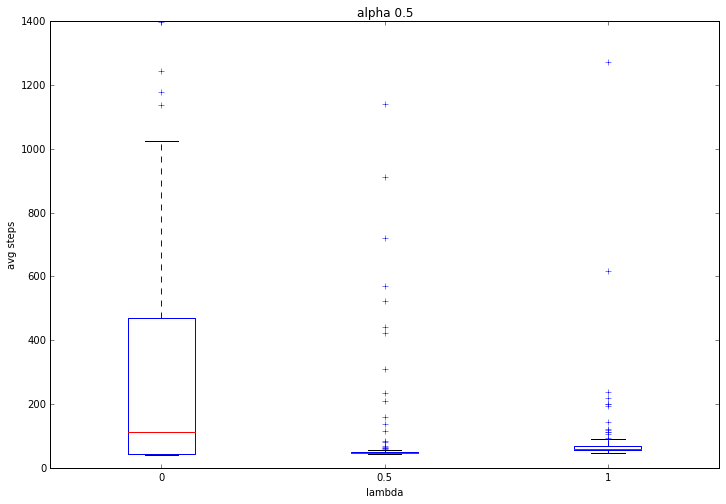

In [19]:
plt.figure(figsize=(12,8))
data = [mean_50[0,:],mean_50[1,:],mean_50[2,:]]
#lambda values
labels=['0','0.5','1']
plt.boxplot(data,labels=labels)
plt.ylabel('avg steps')
plt.xlabel('lambda')
plt.title('alpha 0.5')

# Experiment 2

load value functions for qlearning/ sarsa for different epsilons

In [21]:
numtrials=10
numep = 200
alpha =0.5
eps = [0.05,0.5,0.9] #try multiple eps
lambda_ = 0.5
width = 20
height = 20

#store data in 3d array
qlearning = np.zeros((len(eps),width,height))
sarsa = np.zeros((len(eps),width,height))

for k,e in enumerate(eps):
    with open('data/SARSA_a_'+str(alpha)+'_l_'+str(lambda_)+'_e_'+str(e)+'/SARSA_theta.1','rb') as f:
        vals = pickle.load(f)
        sarsa[k,:,:] = np.max(vals,axis=1).reshape(height,width)
    with open('data/QLEARNING_a_'+str(alpha)+'_l_'+str(lambda_)+'_e_'+str(e)+'/Q-Learning_theta.1','rb') as f:
        vals = pickle.load(f)
        qlearning[k,:,:] += np.max(vals,axis=1).reshape(height,width)

sarsa /= numtrials
qlearning /= numtrials

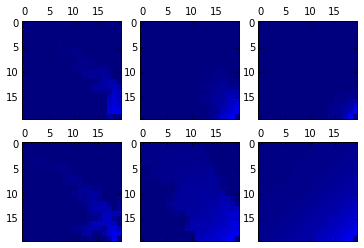

In [22]:
f, axarr = plt.subplots(2,3)
#first row are sarsa values for different eps
for i in range(len(eps)):
    axarr[0,i].matshow(sarsa[i,:,:],vmin=0.,vmax=10)

#second row are qlearning values
for i in range(len(eps)):
    axarr[1,i].matshow(qlearning[i,:,:],vmin=0.,vmax=10)





In [23]:
print 'sarsa valuea of start state:'
#should decrease with increasing epsilon
for i in range(len(eps)):
    print sarsa[i,0,0]


print 'qlearning values of start state:'
#should stay constant with increasing epsilon
for i in range(len(eps)):
    print qlearning[i,0,0]


sarsa valuea of start state:
0.00824280642639
0.000198927661528
1.60307434314e-07
qlearning values of start state:
0.0252278029014
0.0698373965596
0.0383923071575
